In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
from IPython.display import clear_output
!pip install kaggle
clear_output()
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [6]:
!kaggle datasets download -d dasmehdixtr/drone-dataset-uav

 99% 706M/716M [00:10<00:00, 112MB/s]
100% 716M/716M [00:10<00:00, 73.3MB/s]


In [7]:
!unzip /content/drone-dataset-uav.zip


Archive:  /content/drone-dataset-uav.zip
  inflating: dataset_xml_format/dataset_xml_format/foto00088.png  
  inflating: dataset_xml_format/dataset_xml_format/foto00088.xml  
  inflating: dataset_xml_format/dataset_xml_format/foto00117.png  
  inflating: dataset_xml_format/dataset_xml_format/foto00117.xml  
  inflating: dataset_xml_format/dataset_xml_format/foto00204.png  
  inflating: dataset_xml_format/dataset_xml_format/foto00204.xml  
  inflating: dataset_xml_format/dataset_xml_format/foto00233.png  
  inflating: dataset_xml_format/dataset_xml_format/foto00233.xml  
  inflating: dataset_xml_format/dataset_xml_format/foto00262.png  
  inflating: dataset_xml_format/dataset_xml_format/foto00262.xml  
  inflating: dataset_xml_format/dataset_xml_format/foto00291.png  
  inflating: dataset_xml_format/dataset_xml_format/foto00291.xml  
  inflating: dataset_xml_format/dataset_xml_format/foto00320.png  
  inflating: dataset_xml_format/dataset_xml_format/foto00320.xml  
  inflating: dataset_

In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
data_dir = '/content/drone_dataset_yolo/dataset_txt'
train_dir = '/content/datasets/train'
test_dir = '/content/datasets/test'
val_dir = '/content/datasets/val'

# Create train, test, and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)


# Get the list of image and label files
image_files = [file for file in os.listdir(data_dir) if file.endswith('.jpg')]  # Adjust the extension as needed
label_files = [file for file in os.listdir(data_dir) if file.endswith('.txt')]
print(len(image_files), len(label_files))

# Identify label files with corresponding images
valid_label_files = [label_file for label_file in label_files if label_file.replace('.txt', '.jpg') in image_files]

# Remove invalid label files
invalid_label_files = set(label_files) - set(valid_label_files)

# Split the data into train, test, and validation sets
train_images, test_val_images, train_labels, test_val_labels = train_test_split(
    image_files, valid_label_files, test_size=0.3, random_state=42
)

test_images, val_images, test_labels, val_labels = train_test_split(
    test_val_images, test_val_labels, test_size=0.17, random_state=42
)  # 0.2 of the total data for validation and 0.1 for testing

# Move images and labels to their respective directories
def move_files(image_files, label_files, destination_dir):
    os.makedirs(destination_dir, exist_ok=True)
    for img_file, label_file in zip(image_files, label_files):
        shutil.move(os.path.join(data_dir, img_file), os.path.join(destination_dir, img_file))
        shutil.move(os.path.join(data_dir, label_file), os.path.join(destination_dir, label_file))

# Move files to train directory
move_files(train_images, train_labels, train_dir)

# Move files to test directory
move_files(test_images, test_labels, test_dir)

# Move files to validation directory
move_files(val_images, val_labels, val_dir)

# Optionally, remove invalid label files from the original directory
for invalid_label_file in invalid_label_files:
    os.remove(os.path.join(data_dir, invalid_label_file))


1359 1360


In [35]:
!pwd
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data='/content/data.yaml' epochs=40 imgsz=640 plots=True save=True


/content
/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify

In [38]:
!ls {HOME}/runs/detect/train12/

args.yaml					     results.png	    val_batch0_pred.jpg
confusion_matrix.png				     train_batch0.jpg	    val_batch1_labels.jpg
events.out.tfevents.1702659621.2cd546ea5b7b.29471.0  train_batch1800.jpg    val_batch1_pred.jpg
F1_curve.png					     train_batch1801.jpg    val_batch2_labels.jpg
P_curve.png					     train_batch1802.jpg    val_batch2_pred.jpg
PR_curve.png					     train_batch1.jpg	    weights
R_curve.png					     train_batch2.jpg
results.csv					     val_batch0_labels.jpg


/content


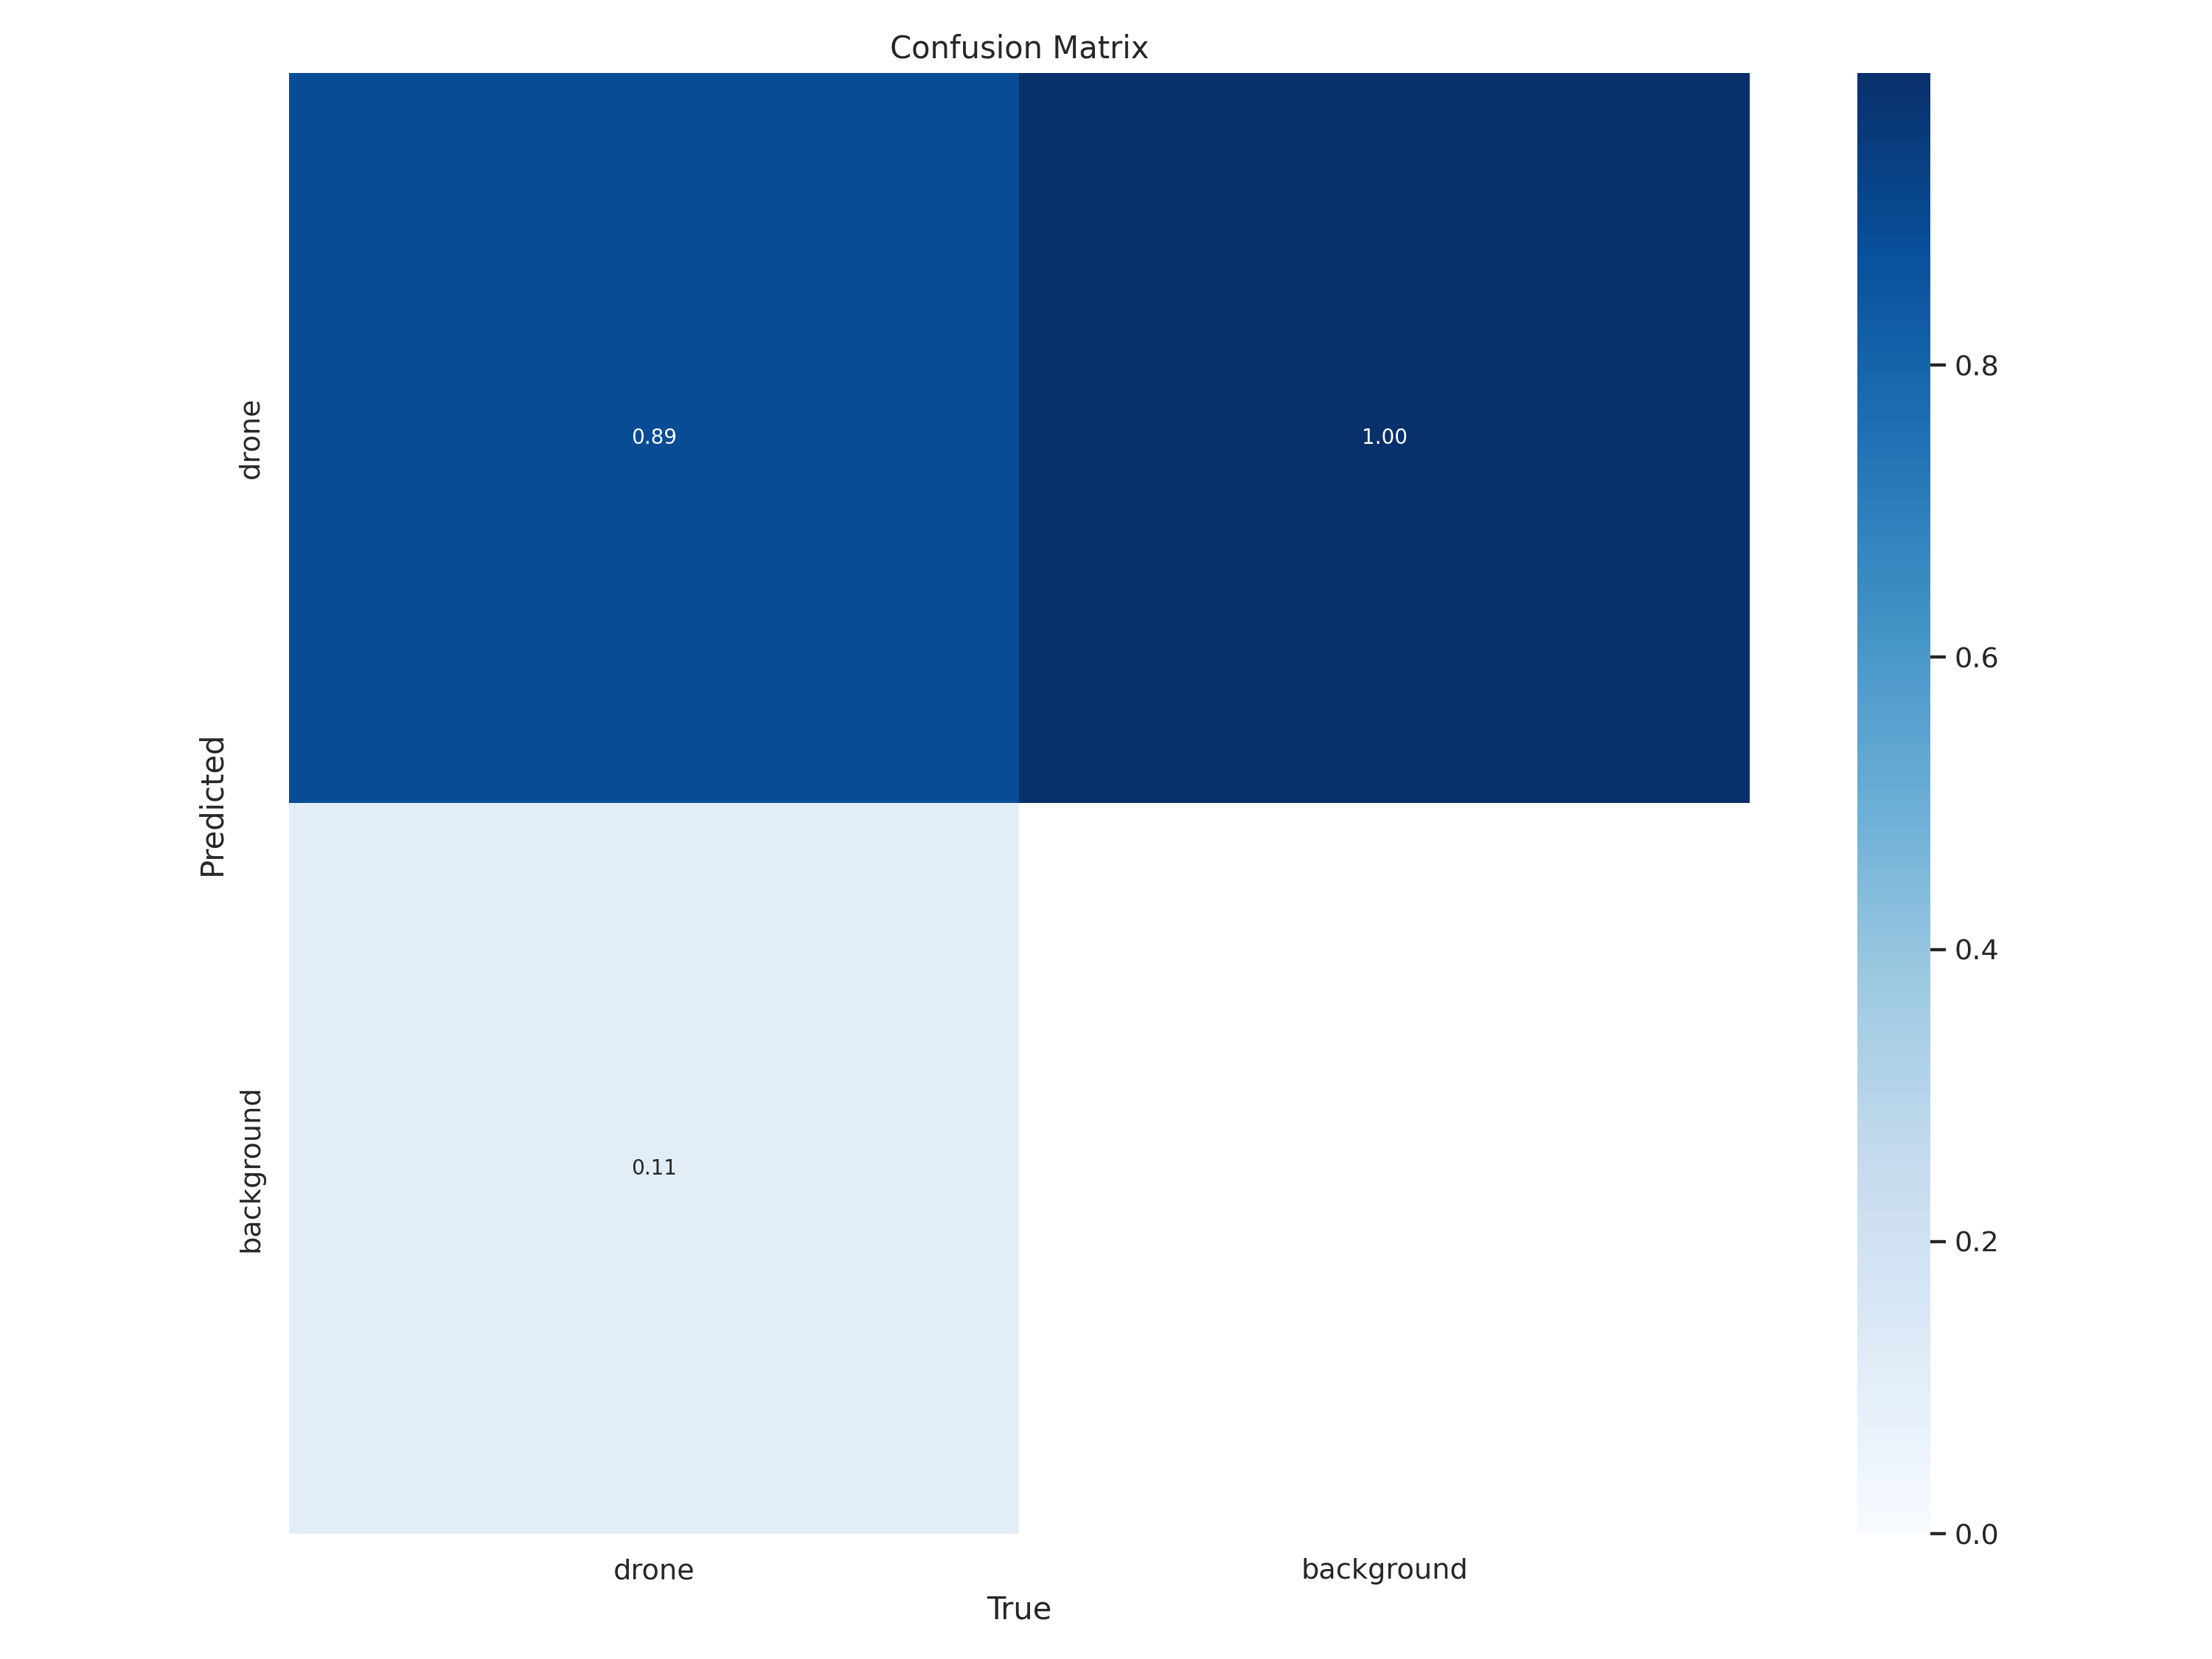

In [39]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train12/confusion_matrix.png', width=600)

/content


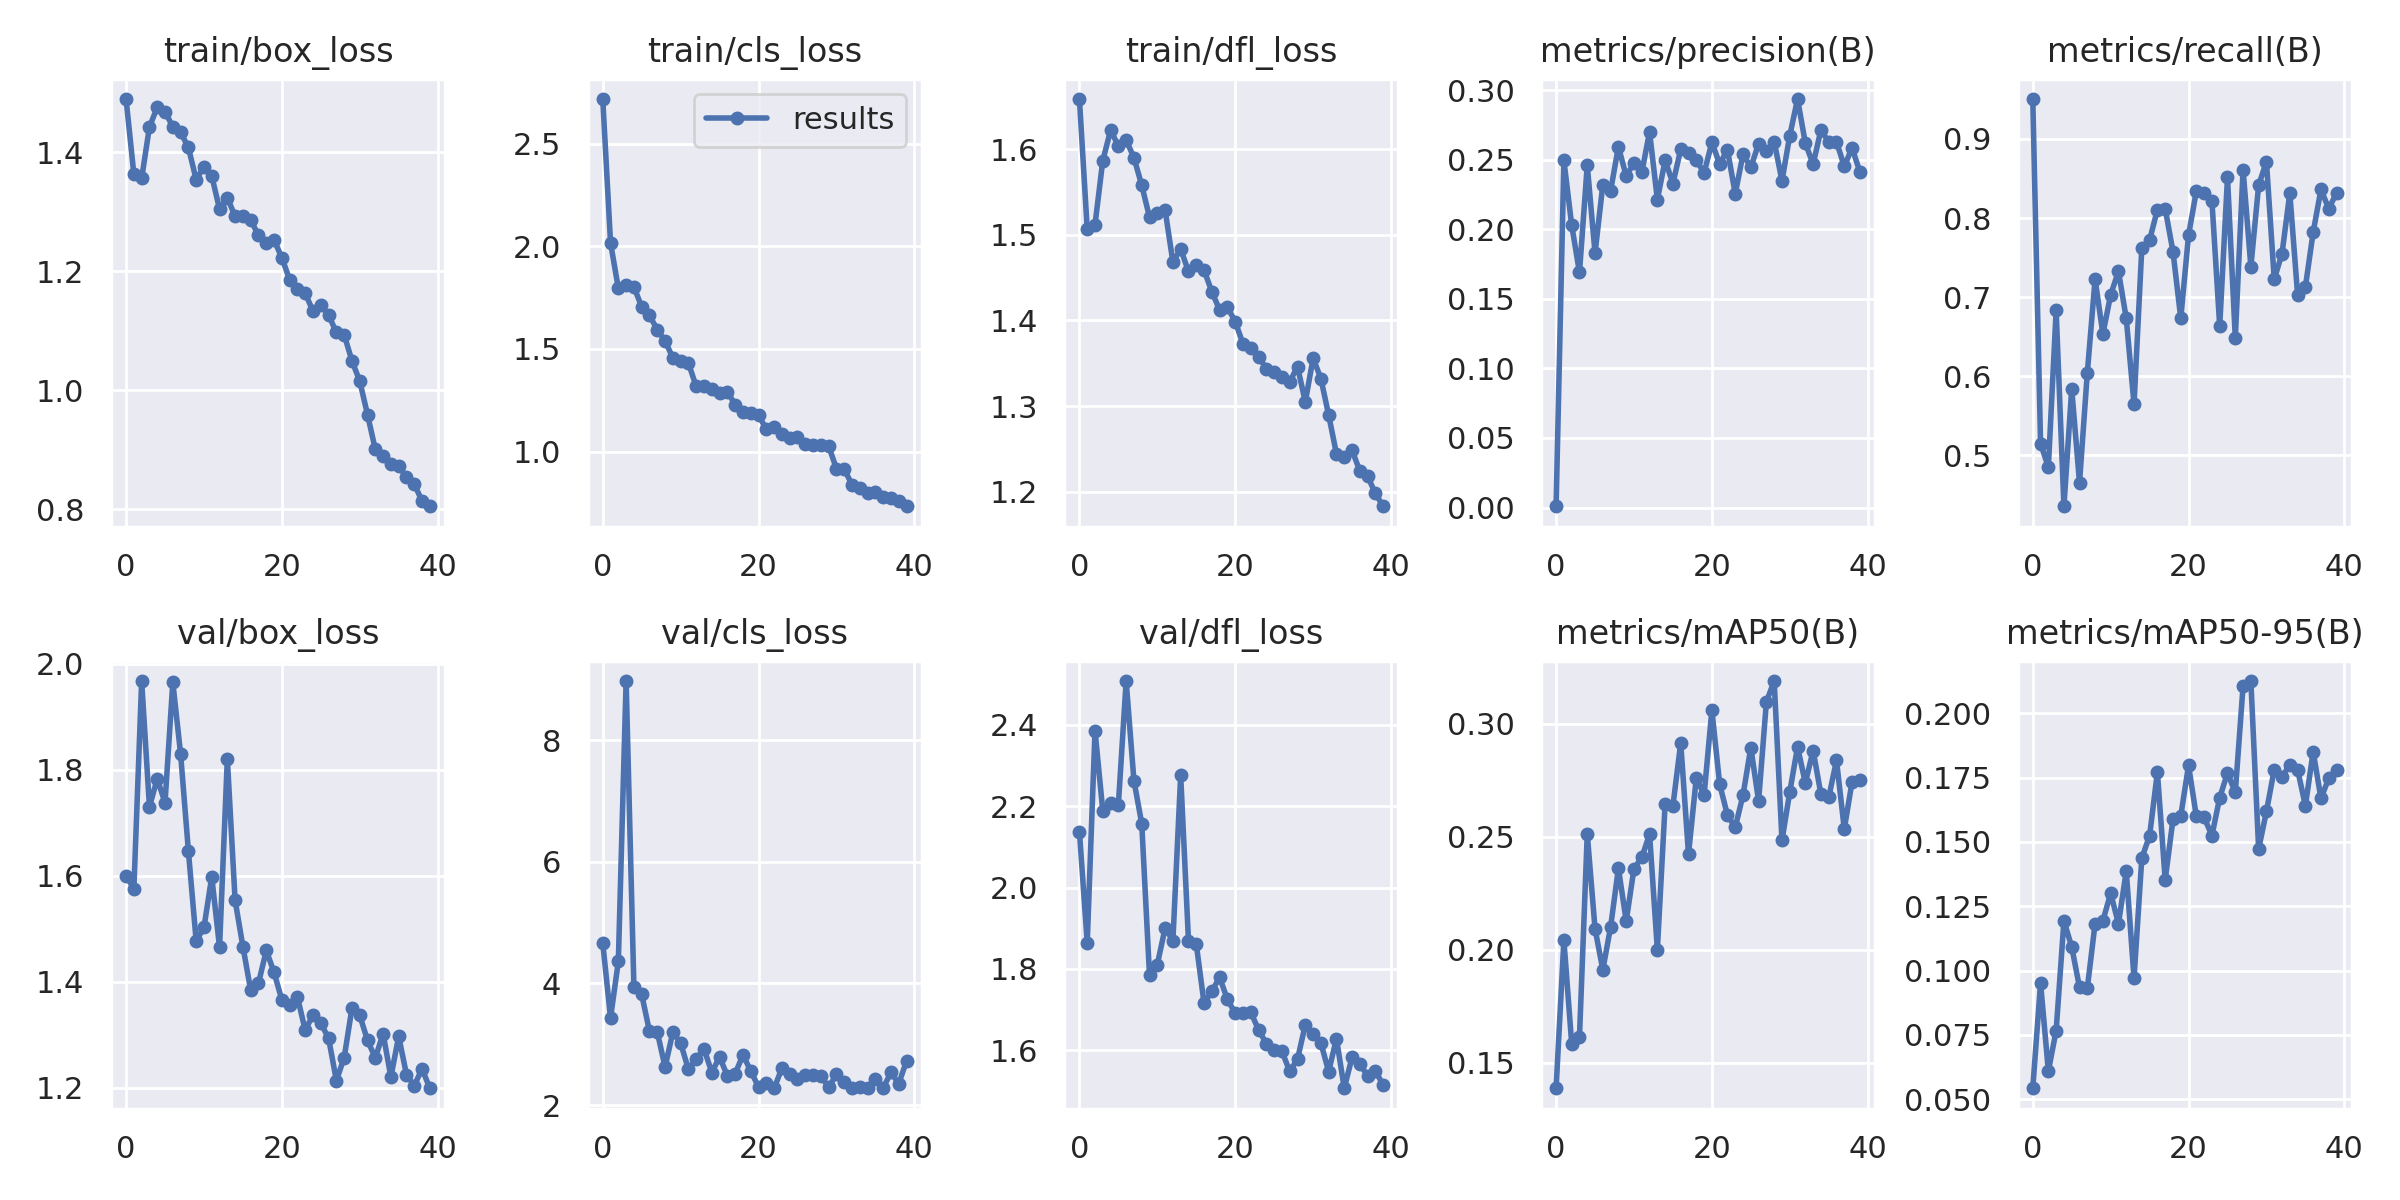

In [40]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train12/results.png', width=600)

/content


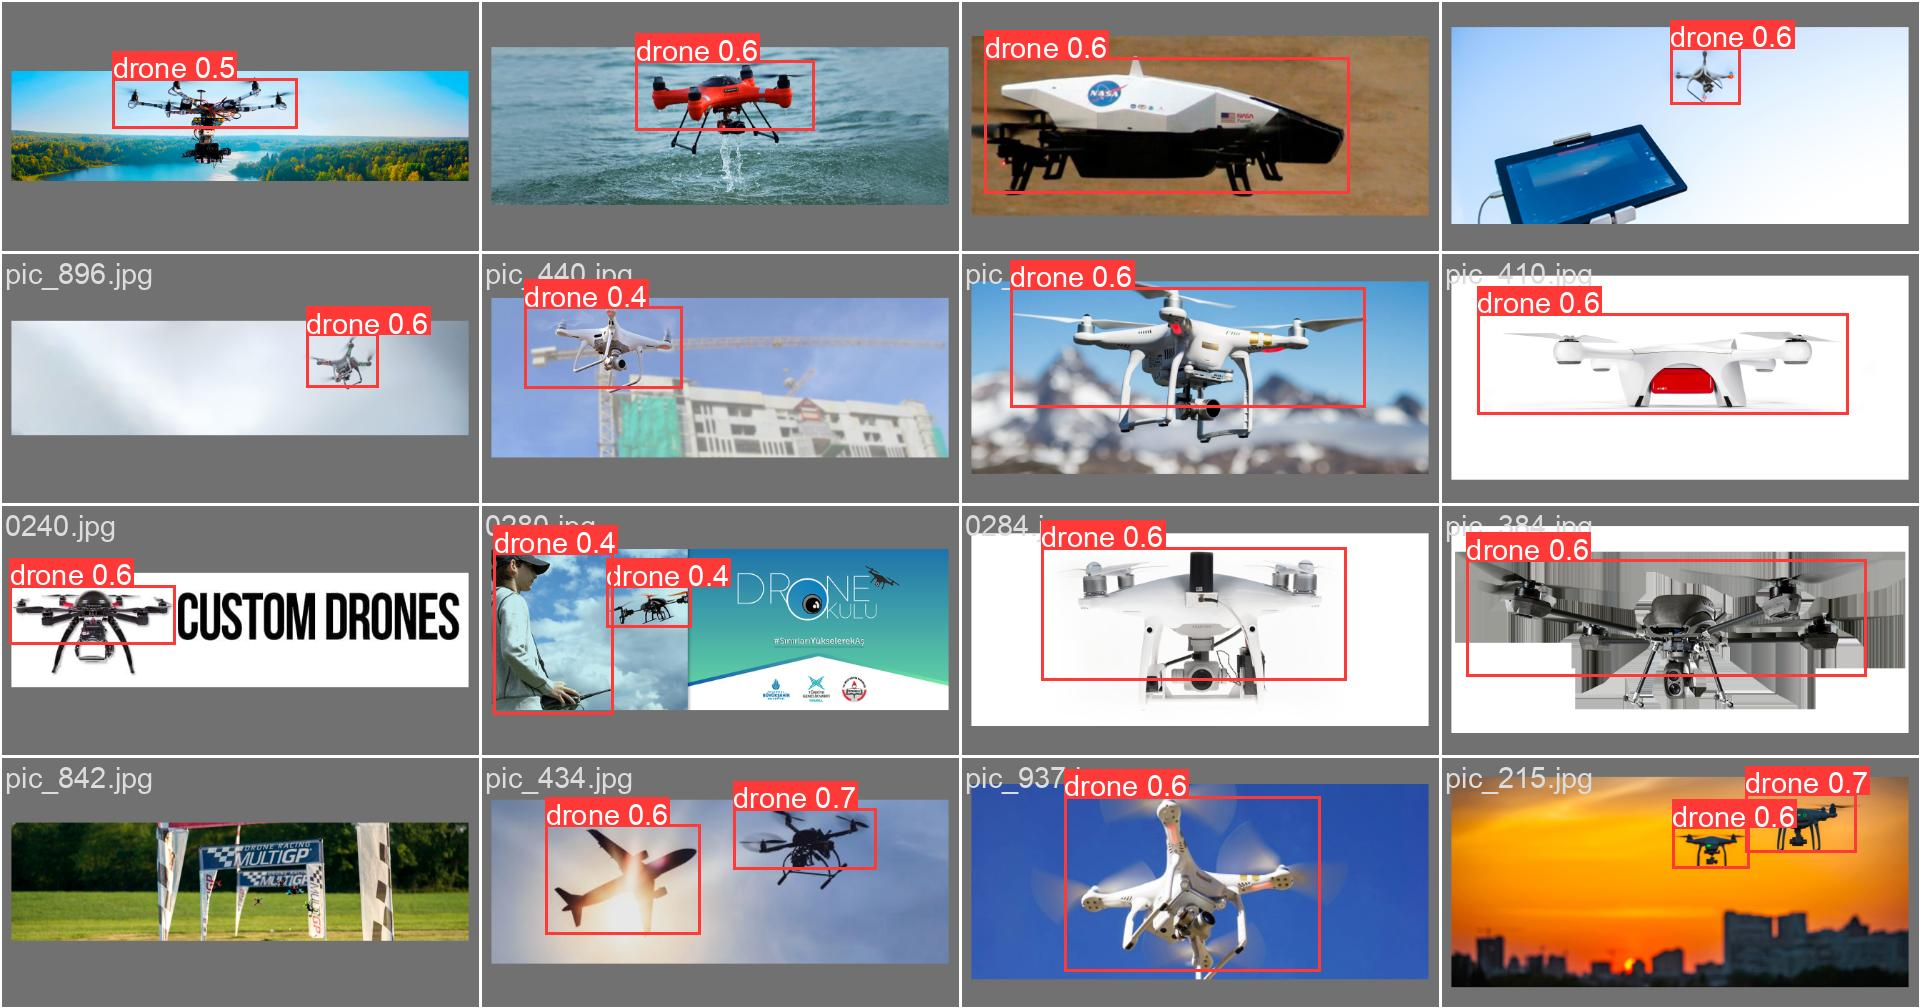

In [41]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train12/val_batch0_pred.jpg', width=600)


In [42]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train12/weights/best.pt data=/content/data.yaml

/content
2023-12-15 18:17:30.304467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 18:17:30.304524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 18:17:30.306502: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 18:17:31.574567: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/test.cache... 88 images, 250 backg

In [43]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train12/weights/best.pt source=/content/datasets/test save=True

/content
2023-12-15 18:23:13.040990: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 18:23:13.041044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 18:23:13.042379: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 18:23:14.077004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
image 1/338 /content/datasets/test/0008.jpg: 448x640 1 drone, 60.0

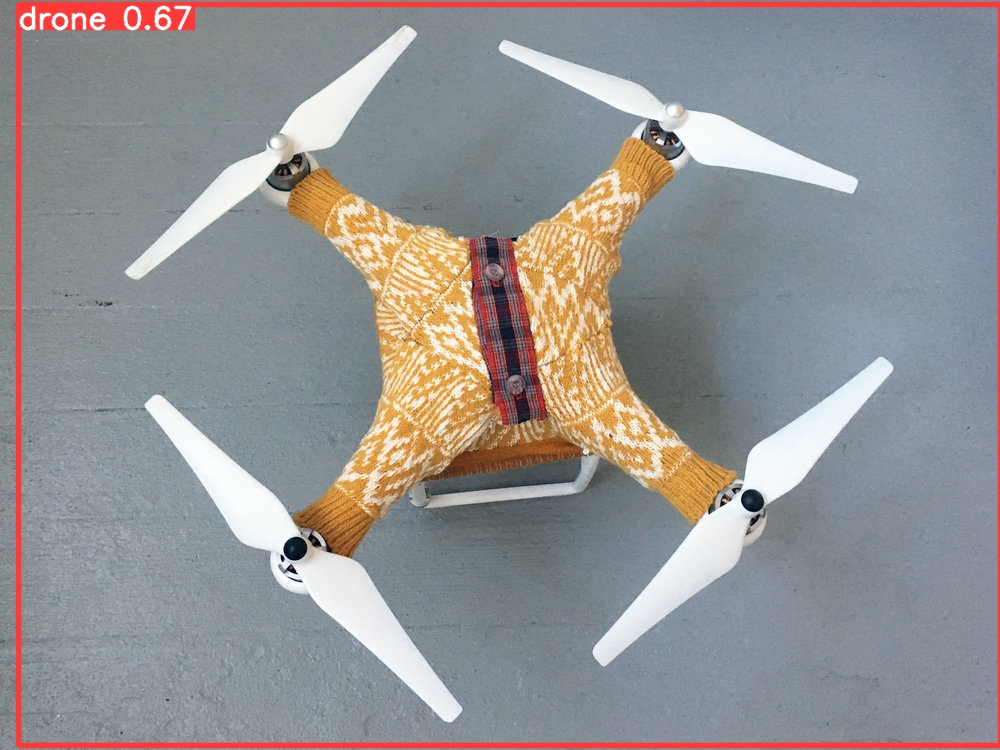

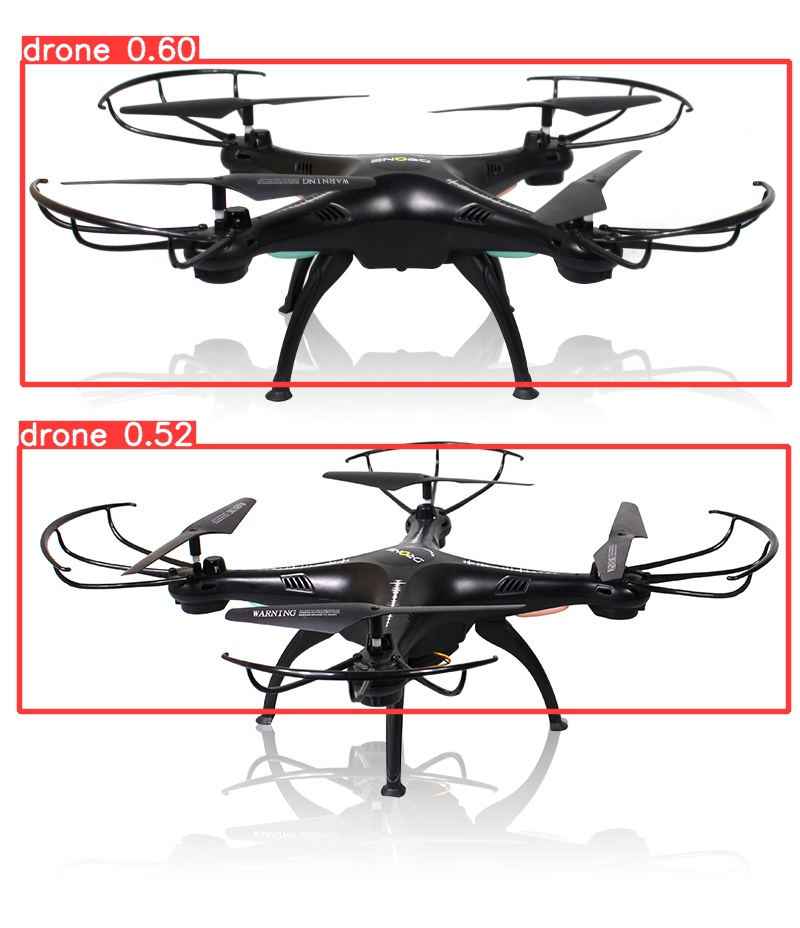

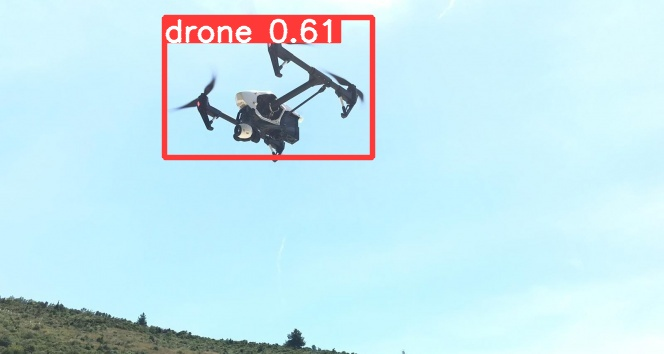

In [44]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")